In [ ]:


!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

!pip install -q findspark

!pip install pyspark



!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark


tar: spark-3.0.1-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 42.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=dadedc7c46a227b7940088d019a3ca1371c244a882d1eb8b10228d3e3c61ef9b
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
tar: spark-3.1.1-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


1. Spark Session 

In [10]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import to_timestamp, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp, lit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()


In [ ]:
X = SparkSession.builder.appName('Assignment3').config(conf=conf).getOrCreate()

2. Read Data 

In [9]:
df = X.read.options(inferSchema='True', header = 'True').csv("/content/Crimes_-_2001_to_Present.csv")

3.View Data

In [11]:
df.show()

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE|

4. Know the Schema of the data 

In [12]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [13]:
df.count(),len(df.columns)

(3574000, 22)

5.Clean Data 

In [14]:
df2 = df.dropna()
df2.count(),len(df2.columns)

(2972642, 22)

6.Change data Column data type 

In [15]:
df3 = df2.withColumn('date',to_timestamp('date',format = 'MM/dd/yyyy hh:mm:ss a'))
display(df3)

DataFrame[ID: int, Case Number: string, date: timestamp, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [16]:
df3.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



7.Filter Data last 10 Years 


In [17]:
df3 = df3.filter(df3.Year>2011)
df3.show()

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|        BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

In [18]:
(df3.select('Year').distinct().sort('Year')).show()

+----+
|Year|
+----+
|2012|
|2013|
|2014|
|2015|
|2016|
|2017|
|2018|
|2019|
|2020|
|2021|
|2022|
+----+



#### 8) Remove all the records with the following crime types:
##### 'NON-CRIMINAL (SUBJECT SPECIFIED)'
##### 'OTHER OFFENSE'
##### 'STALKING'
##### 'NON - CRIMINAL'
##### 'ARSON'

In [19]:
df3.select('Primary Type').distinct().show()

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
+--------------------+
only showing top 20 rows



In [20]:
list=['NON-CRIMINAL (SUBJECT SPECIFIED)','OTHER OFFENSE','STALKING','NON - CRIMINAL','ARSON']
df3 = df3.filter(~df3['Primary Type'].isin(list))


In [21]:
df3.select('Primary Type').distinct().collect()

[Row(Primary Type='OFFENSE INVOLVING CHILDREN'),
 Row(Primary Type='CRIMINAL SEXUAL ASSAULT'),
 Row(Primary Type='PUBLIC PEACE VIOLATION'),
 Row(Primary Type='OBSCENITY'),
 Row(Primary Type='GAMBLING'),
 Row(Primary Type='CRIMINAL TRESPASS'),
 Row(Primary Type='ASSAULT'),
 Row(Primary Type='LIQUOR LAW VIOLATION'),
 Row(Primary Type='MOTOR VEHICLE THEFT'),
 Row(Primary Type='THEFT'),
 Row(Primary Type='BATTERY'),
 Row(Primary Type='ROBBERY'),
 Row(Primary Type='HOMICIDE'),
 Row(Primary Type='PUBLIC INDECENCY'),
 Row(Primary Type='CRIM SEXUAL ASSAULT'),
 Row(Primary Type='HUMAN TRAFFICKING'),
 Row(Primary Type='INTIMIDATION'),
 Row(Primary Type='PROSTITUTION'),
 Row(Primary Type='DECEPTIVE PRACTICE'),
 Row(Primary Type='CONCEALED CARRY LICENSE VIOLATION'),
 Row(Primary Type='SEX OFFENSE'),
 Row(Primary Type='CRIMINAL DAMAGE'),
 Row(Primary Type='NARCOTICS'),
 Row(Primary Type='NON-CRIMINAL'),
 Row(Primary Type='KIDNAPPING'),
 Row(Primary Type='BURGLARY'),
 Row(Primary Type='WEAPONS VIOLA

9.Merge similar Crimes 

In [22]:
# df3 = df3.replace(['NON-CRIMINAL (SUBJECT SPECIFIED)','NON - CRIMINAL','NON-CRIMINAL'],'NON-CRIMINAL','Primary Type')
df3 = df3.replace(['CRIM SEXUAL ASSAULT','CRIMINAL SEXUAL ASSAULT'],'SEXUAL ASSAULT','Primary Type')
df3 = df3.replace(['SEX OFFENSE','PROSTITUTION'],'SEXUAL OFFENSE','Primary Type')
df3 = df3.replace(['BURGLARY','THEFT','ROBBERY'],'THEFT','Primary Type')
df3 = df3.replace(['PUBLIC PEACE VIOLATION','PUBLIC INDECENCY'],'PUBLIC OFFENSE','Primary Type')

In [23]:
df3.select('Primary Type').distinct().collect()

[Row(Primary Type='OFFENSE INVOLVING CHILDREN'),
 Row(Primary Type='OBSCENITY'),
 Row(Primary Type='SEXUAL OFFENSE'),
 Row(Primary Type='GAMBLING'),
 Row(Primary Type='CRIMINAL TRESPASS'),
 Row(Primary Type='ASSAULT'),
 Row(Primary Type='LIQUOR LAW VIOLATION'),
 Row(Primary Type='MOTOR VEHICLE THEFT'),
 Row(Primary Type='THEFT'),
 Row(Primary Type='PUBLIC OFFENSE'),
 Row(Primary Type='BATTERY'),
 Row(Primary Type='HOMICIDE'),
 Row(Primary Type='HUMAN TRAFFICKING'),
 Row(Primary Type='INTIMIDATION'),
 Row(Primary Type='DECEPTIVE PRACTICE'),
 Row(Primary Type='CONCEALED CARRY LICENSE VIOLATION'),
 Row(Primary Type='CRIMINAL DAMAGE'),
 Row(Primary Type='SEXUAL ASSAULT'),
 Row(Primary Type='NARCOTICS'),
 Row(Primary Type='NON-CRIMINAL'),
 Row(Primary Type='KIDNAPPING'),
 Row(Primary Type='WEAPONS VIOLATION'),
 Row(Primary Type='OTHER NARCOTIC VIOLATION'),
 Row(Primary Type='INTERFERENCE WITH PUBLIC OFFICER')]

### 10)Analyze the data and present results:
##### a)Show year-wise trend of the crime for last ten years.

In [24]:
df3_v1 = (((df3.groupby('Year').count())).sort('Year')).toPandas()

In [25]:
print(df3_v1)

    Year   count
0   2012     160
1   2013     292
2   2014     776
3   2015  152656
4   2016  242625
5   2017  240733
6   2018  239830
7   2019  110237
8   2020   16071
9   2021    2366
10  2022     264


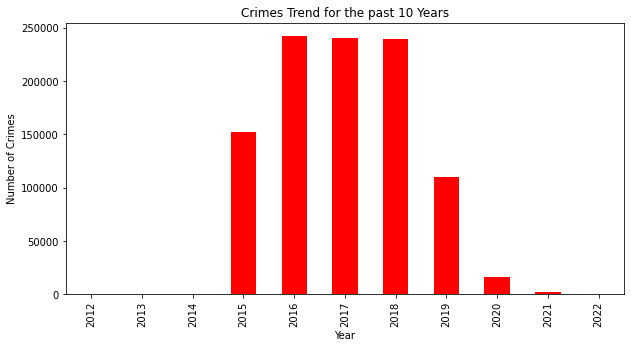

In [31]:
df3_v1.plot(x = 'Year',y='count'
            ,kind='bar',figsize =(10,5),legend=False,color='red',title='Crimes Trend for the past 10 Years',ylabel='Number of Crimes')
plt.show()

#### b) Find out at which hour of the day crime is highest.

In [27]:
df3 = df3.withColumn('hour',hour(col('Date')))

In [28]:
df3_v2 = df3.groupBy(df3.hour).count().sort('count',ascending=False).toPandas()
df3_v2.head(1)

,hour,count
0,12,59139


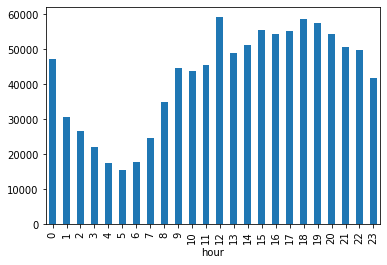

In [29]:
df3_v2 = df3.groupBy(df3.hour).count().sort('hour').toPandas()
df3_v2.plot(kind='bar',x='hour',y='count',legend=False)

#### c) Find top ten crimes and present them as a bar chart.

In [30]:
df3_v3 = (((df3.groupby('Primary Type').count())).sort('count',ascending=False)).toPandas()
df3_v3

,Primary Type,count
0,THEFT,347430
1,BATTERY,203915
2,CRIMINAL DAMAGE,120761
3,ASSAULT,78580
4,DECEPTIVE PRACTICE,69954
5,NARCOTICS,57246
6,MOTOR VEHICLE THEFT,43860
7,CRIMINAL TRESPASS,27405
8,WEAPONS VIOLATION,19412
9,OFFENSE INVOLVING CHILDREN,8861


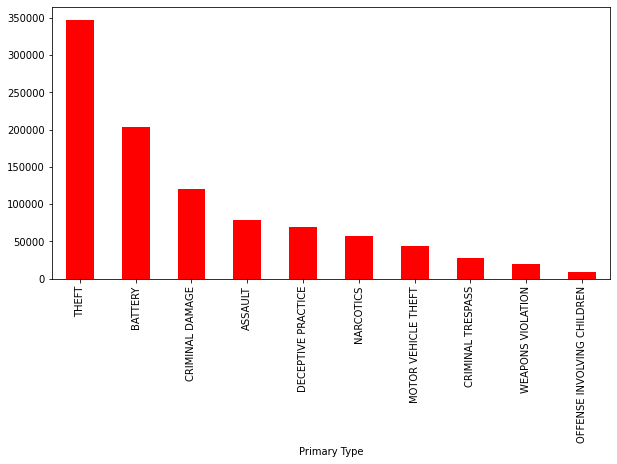

In [33]:
df3_v3.head(10).plot(x ='Primary Type',y = 'count'
            ,kind='bar',figsize=(10,5),color='red',legend=False)